In [2]:
%load_ext autoreload
%autoreload 2
import datalib as dl
import nn
import params as p
import pandas as pd
from hyperopt import fmin, tpe, hp, Trials, space_eval
from hyperopt.pyll.base import scope
import shutil
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tuning Moon Model

Loaded ETHUSD prices from KRAKEN via cc Rows:2061 Date:2021-03-28 00:00:00
Last complete day close: 1713.31


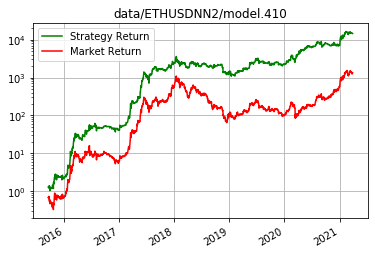

Strategy Return: 14543.95
Market Return: 1335.25
Sortino Ratio: 3.93
Bars in Trade: 4
Buy Pct: 0.57
Accuracy: 0.56
Win Ratio: 0.60
Avg Win: 0.07
Avg Loss: 0.03
Risk to Reward: 2.12
Expectancy: 2.74
Sharpe Ratio: 2.20
Average Daily Return: 0.008
SL: 0.00 TP: 0.00


In [7]:
p.datasource = 'cc'
td = nn.runNN2()

In [12]:
def runNN2():
    ds = dl.load_data(p.ticker, p.currency)
    ds['DR'] = ds['close'] / ds['close'].shift(1)
    ds['ADR'] = ds['DR'].rolling(window=p.adr_period).mean()
    ds['ROC'] = talib.ROC(ds['close'].values, timeperiod=p.roc_period)

    calendar = dl.get_calendar(ds.date.min(), ds.date.max())
    ds = pd.merge(calendar, ds, on='date', how='left')
    ds = ds.dropna()

    for col in calendar.columns:
        if col == 'date':
            continue
        ds = dl.encode(ds, col, 359)

    td = nn.train_test_nn(ds)
    return td

Loaded ETHUSD prices from KRAKEN via cc Rows:2061 Date:2021-03-28 00:00:00
Last complete day close: 1713.31


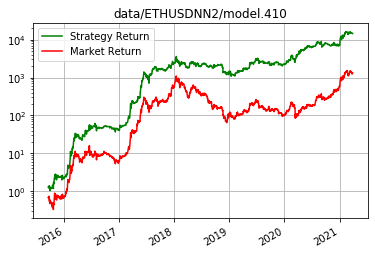

Strategy Return: 14524.84
Market Return: 1333.50
Sortino Ratio: 3.93
Bars in Trade: 4
Buy Pct: 0.57
Accuracy: 0.56
Win Ratio: 0.60
Avg Win: 0.07
Avg Loss: 0.03
Risk to Reward: 2.12
Expectancy: 2.74
Sharpe Ratio: 2.20
Average Daily Return: 0.008
SL: 0.00 TP: 0.00


In [13]:
ds = runNN2()

In [20]:
p.cfgdir

'data/ETHUSDNN2'

In [22]:
space = {
    'adr_period': scope.int(hp.quniform('adr_period', 1, 100, 1)),
    'roc_period': scope.int(hp.quniform('roc_period', 1, 100, 1))
}

In [29]:
def f(space):
    print('Testing Parameters: '+str(space))
    p.adr_period=space['adr_period']
    p.roc_period=space['roc_period']
    sr = runNN2().iloc[-1]['CSR']
    
    if sr > p.top_sr:
        print('*** SR Improved!!! ***')
        shutil.rmtree(p.cfgdir+'/top_model.nn') 
        shutil.move(p.model, p.cfgdir+'/top_model.nn')
        shutil.move(p.cfgdir + '/sc.dmp', p.cfgdir + '/top_sc.dmp')
        shutil.move(p.cfgdir + '/sc1.dmp', p.cfgdir + '/top_sc1.dmp')
        p.top_sr = sr
    
    print('SR: '+str(sr))
    
    return -sr

Testing Parameters: {'adr_period': 46, 'roc_period': 68}
Using loaded prices for 2021-03-28                     
*** Training model with 32 units per layer ***         
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/

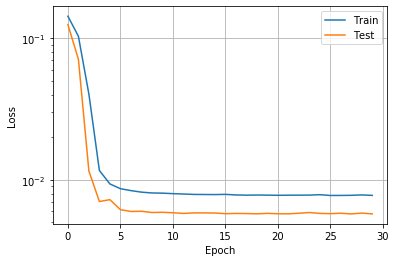

*** SR Improved!!! ***                                 
SR: 3.1390954156287765                                 
Testing Parameters: {'adr_period': 65, 'roc_period': 10}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
  1%|          | 1/100 [00:09<14:39,  8.88s/trial, best loss: -3.1390954156287765]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets writte

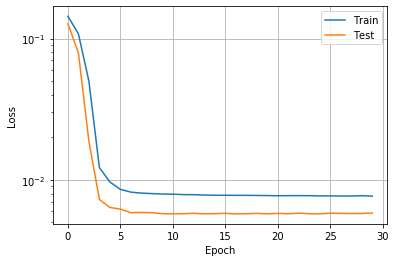

*** SR Improved!!! ***                                                            
SR: 3.9247286010342313                                                            
Testing Parameters: {'adr_period': 67, 'roc_period': 24}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
  2%|▏         | 2/100 [00:18<14:10,  8.68s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/E

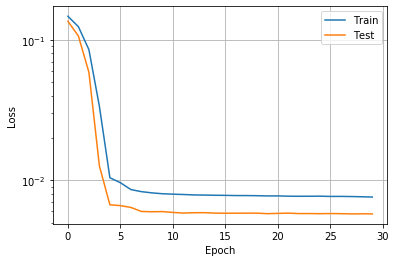

SR: 3.397044996012248                                                             
Testing Parameters: {'adr_period': 95, 'roc_period': 100}                         
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
  3%|▎         | 3/100 [00:28<15:15,  9.44s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

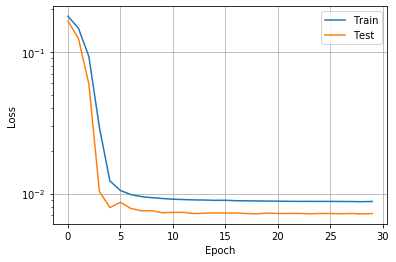

SR: 3.086342070526719                                                             
Testing Parameters: {'adr_period': 40, 'roc_period': 49}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
  4%|▍         | 4/100 [00:36<13:57,  8.73s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

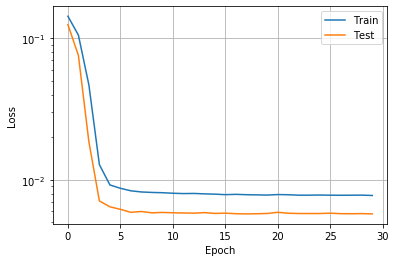

SR: 1.7570711240027639                                                            
Testing Parameters: {'adr_period': 58, 'roc_period': 8}                           
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
  5%|▌         | 5/100 [00:44<13:46,  8.70s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

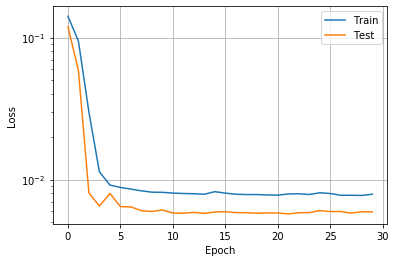

SR: 3.8308073105386984                                                            
Testing Parameters: {'adr_period': 33, 'roc_period': 70}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
  6%|▌         | 6/100 [00:52<13:20,  8.51s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

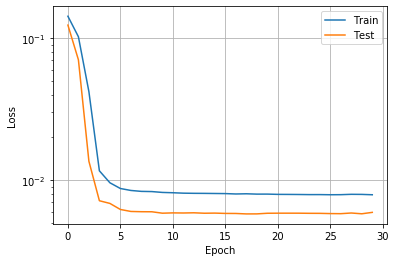

SR: 3.2682716005280956                                                            
Testing Parameters: {'adr_period': 29, 'roc_period': 76}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
  7%|▋         | 7/100 [01:02<13:49,  8.92s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

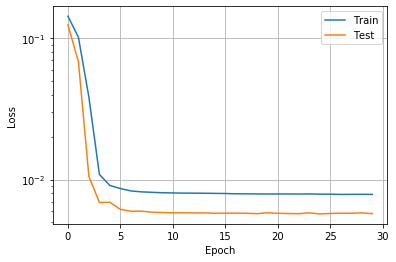

SR: 2.4506199955981156                                                            
Testing Parameters: {'adr_period': 39, 'roc_period': 24}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
  8%|▊         | 8/100 [01:12<14:09,  9.24s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

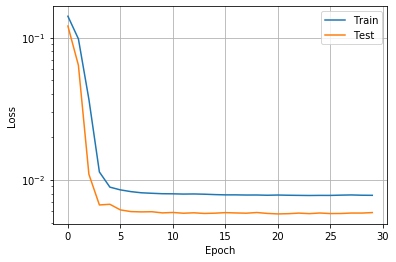

SR: 2.5494046363329965                                                            
Testing Parameters: {'adr_period': 1, 'roc_period': 21}                           
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
  9%|▉         | 9/100 [01:20<13:29,  8.89s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

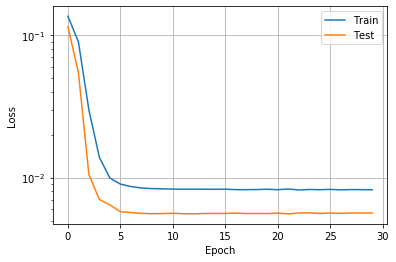

SR: 3.323722847625707                                                             
Testing Parameters: {'adr_period': 88, 'roc_period': 6}                            
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 10%|█         | 10/100 [01:29<13:08,  8.76s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mode

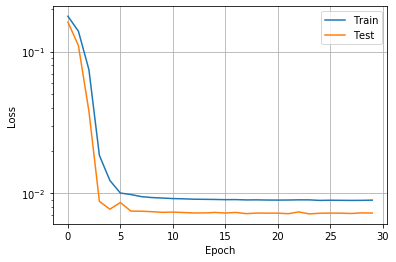

SR: 2.903856450796417                                                              
Testing Parameters: {'adr_period': 56, 'roc_period': 5}                            
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 11%|█         | 11/100 [01:38<13:24,  9.04s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

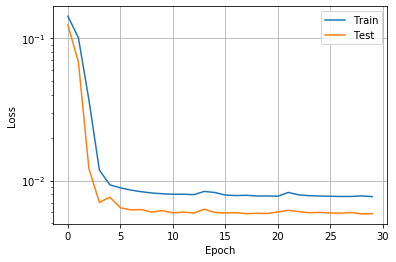

SR: 2.434424621370806                                                              
Testing Parameters: {'adr_period': 79, 'roc_period': 58}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 12%|█▏        | 12/100 [01:46<12:35,  8.59s/trial, best loss: -3.9247286010342313]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

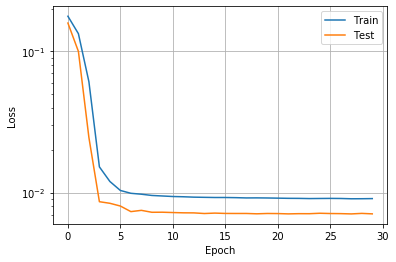

*** SR Improved!!! ***                                                             
SR: 4.337278461006826                                                              
Testing Parameters: {'adr_period': 4, 'roc_period': 77}                            
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 13%|█▎        | 13/100 [01:55<12:49,  8.84s/trial, best loss: -4.337278461006826]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: dat

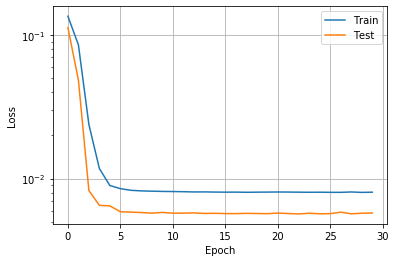

SR: 3.1909865023518433                                                            
Testing Parameters: {'adr_period': 56, 'roc_period': 72}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 14%|█▍        | 14/100 [02:05<12:52,  8.98s/trial, best loss: -4.337278461006826]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

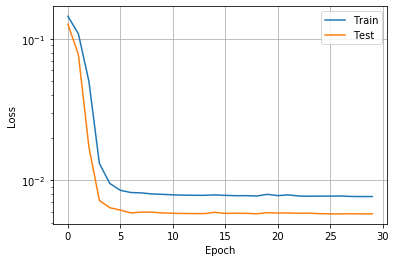

*** SR Improved!!! ***                                                            
SR: 5.377412450376564                                                             
Testing Parameters: {'adr_period': 84, 'roc_period': 59}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 15%|█▌        | 15/100 [02:14<12:43,  8.98s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/E

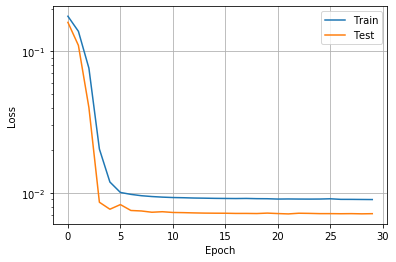

SR: 3.048222336749528                                                             
Testing Parameters: {'adr_period': 85, 'roc_period': 83}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 16%|█▌        | 16/100 [02:25<13:22,  9.55s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

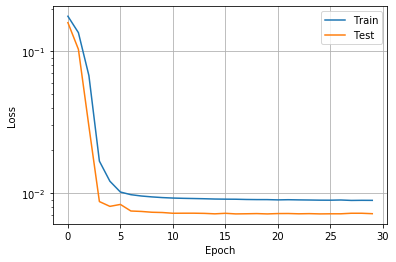

SR: 3.2463103931743684                                                            
Testing Parameters: {'adr_period': 53, 'roc_period': 28}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 17%|█▋        | 17/100 [02:34<13:00,  9.41s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

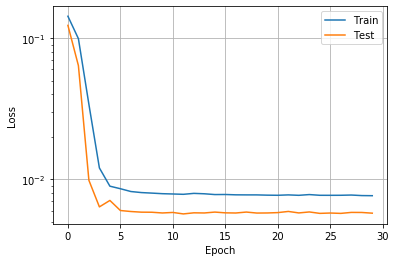

SR: 3.419092488469686                                                             
Testing Parameters: {'adr_period': 31, 'roc_period': 92}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 18%|█▊        | 18/100 [02:41<12:06,  8.86s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

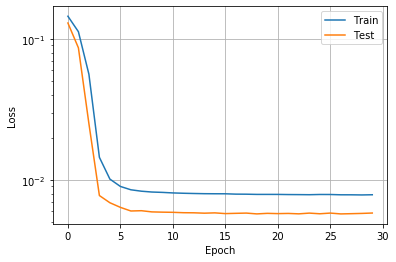

SR: 2.2741549707788526                                                            
Testing Parameters: {'adr_period': 48, 'roc_period': 67}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 19%|█▉        | 19/100 [02:51<12:20,  9.14s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

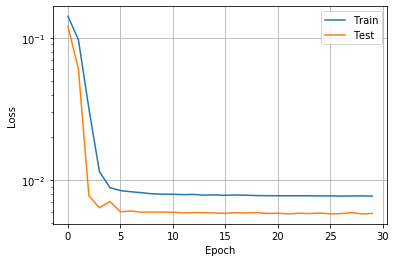

SR: 3.1017993348647006                                                            
Testing Parameters: {'adr_period': 74, 'roc_period': 43}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 20%|██        | 20/100 [03:00<12:10,  9.13s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

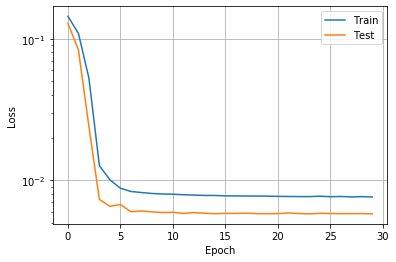

SR: 3.501389923336213                                                             
Testing Parameters: {'adr_period': 20, 'roc_period': 56}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 21%|██        | 21/100 [03:09<11:52,  9.02s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

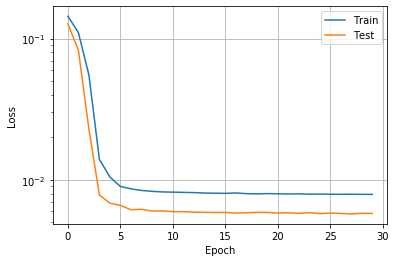

SR: 2.992061176612224                                                             
Testing Parameters: {'adr_period': 75, 'roc_period': 38}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 22%|██▏       | 22/100 [03:20<12:38,  9.72s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

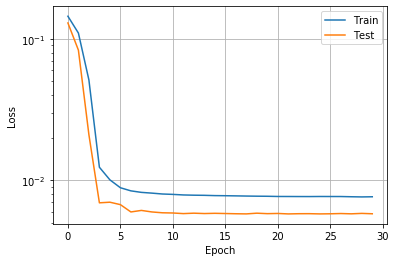

SR: 3.5528722173376703                                                            
Testing Parameters: {'adr_period': 95, 'roc_period': 99}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 23%|██▎       | 23/100 [03:29<12:11,  9.50s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

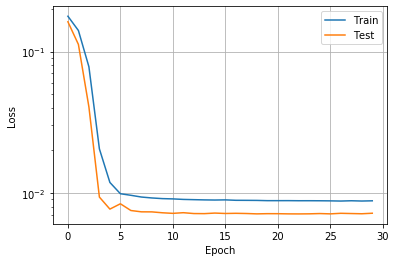

SR: 2.8780162521270602                                                            
Testing Parameters: {'adr_period': 75, 'roc_period': 91}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 24%|██▍       | 24/100 [03:40<12:22,  9.77s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

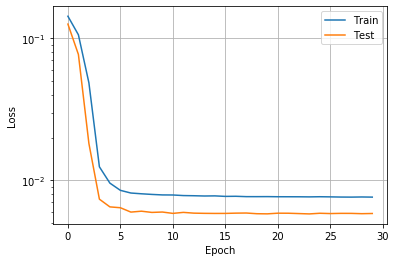

SR: 3.1585892868463135                                                            
Testing Parameters: {'adr_period': 64, 'roc_period': 58}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 25%|██▌       | 25/100 [03:48<11:52,  9.50s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

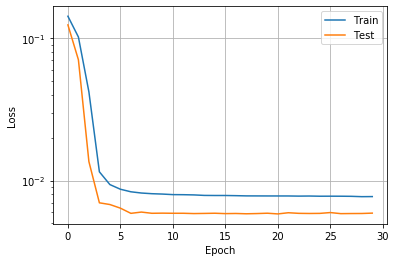

SR: 3.3905942540814245                                                            
Testing Parameters: {'adr_period': 22, 'roc_period': 40}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 26%|██▌       | 26/100 [03:56<11:03,  8.96s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

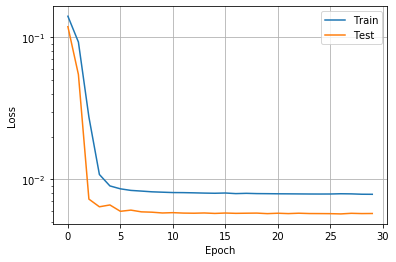

SR: 4.564274948289658                                                             
Testing Parameters: {'adr_period': 14, 'roc_period': 39}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 27%|██▋       | 27/100 [04:05<10:58,  9.02s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

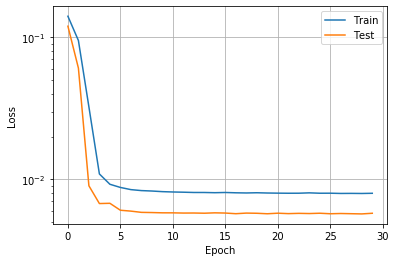

SR: 3.4258876326375147                                                            
Testing Parameters: {'adr_period': 19, 'roc_period': 33}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 28%|██▊       | 28/100 [04:15<11:02,  9.20s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

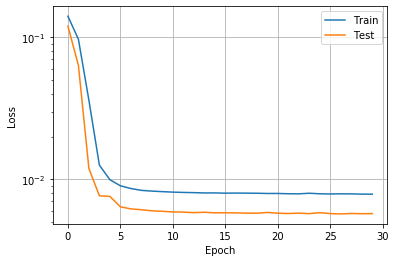

SR: 2.695561457607936                                                             
Testing Parameters: {'adr_period': 43, 'roc_period': 48}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 29%|██▉       | 29/100 [04:27<11:50, 10.00s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

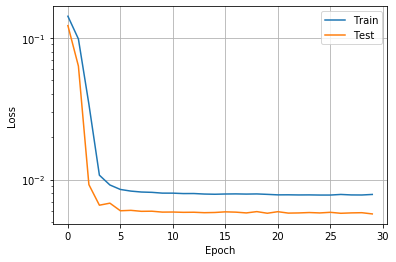

SR: 2.835479818833269                                                             
Testing Parameters: {'adr_period': 12, 'roc_period': 64}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 30%|███       | 30/100 [04:36<11:14,  9.63s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

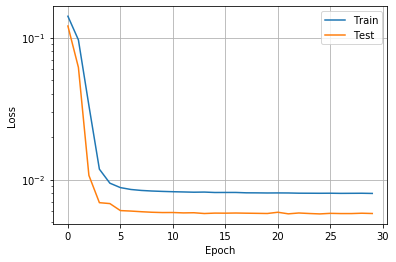

SR: 2.646406803244618                                                             
Testing Parameters: {'adr_period': 7, 'roc_period': 17}                           
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 31%|███       | 31/100 [04:45<10:55,  9.49s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

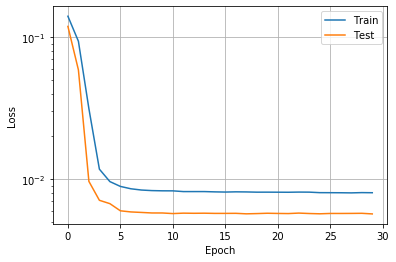

SR: 3.2029643767321154                                                            
Testing Parameters: {'adr_period': 26, 'roc_period': 77}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 32%|███▏      | 32/100 [04:54<10:30,  9.28s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

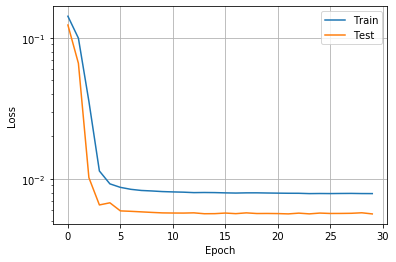

SR: 2.1161835037156207                                                            
Testing Parameters: {'adr_period': 62, 'roc_period': 85}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 33%|███▎      | 33/100 [05:03<10:17,  9.22s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

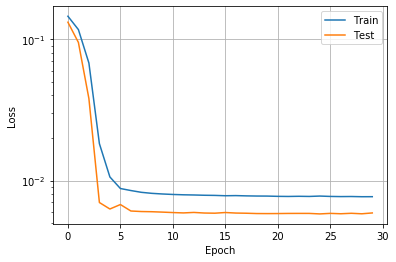

SR: 3.436593889116087                                                             
Testing Parameters: {'adr_period': 37, 'roc_period': 53}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 34%|███▍      | 34/100 [05:13<10:33,  9.59s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

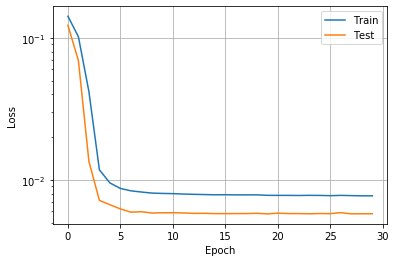

SR: 2.641733163277038                                                             
Testing Parameters: {'adr_period': 47, 'roc_period': 45}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 35%|███▌      | 35/100 [05:21<10:00,  9.24s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

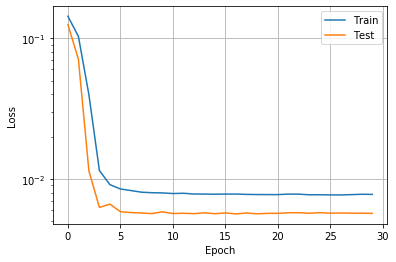

SR: 5.00077331134003                                                              
Testing Parameters: {'adr_period': 49, 'roc_period': 46}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 36%|███▌      | 36/100 [05:29<09:25,  8.84s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

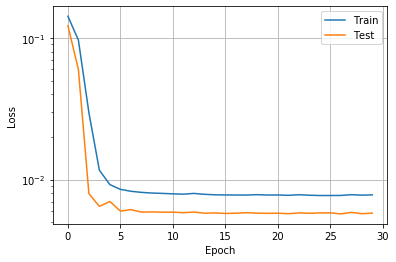

SR: 3.9573261621940623                                                            
Testing Parameters: {'adr_period': 60, 'roc_period': 72}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 37%|███▋      | 37/100 [05:38<09:18,  8.86s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

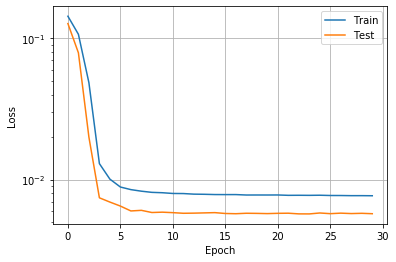

SR: 3.6504057149746916                                                            
Testing Parameters: {'adr_period': 69, 'roc_period': 62}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 38%|███▊      | 38/100 [05:48<09:21,  9.06s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

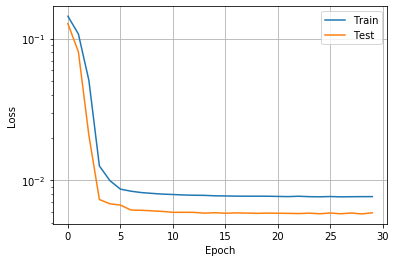

SR: 3.3589690021420924                                                            
Testing Parameters: {'adr_period': 44, 'roc_period': 13}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 39%|███▉      | 39/100 [05:59<09:54,  9.75s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

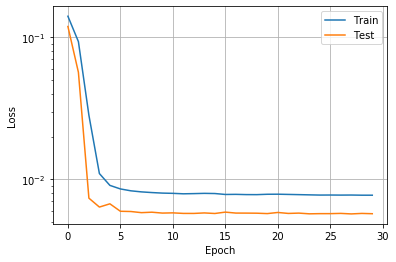

SR: 3.2193673209466724                                                            
Testing Parameters: {'adr_period': 55, 'roc_period': 33}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 40%|████      | 40/100 [06:08<09:29,  9.50s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

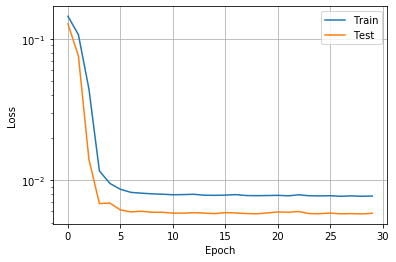

SR: 3.3191536062687055                                                            
Testing Parameters: {'adr_period': 36, 'roc_period': 85}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 41%|████      | 41/100 [06:17<08:59,  9.15s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

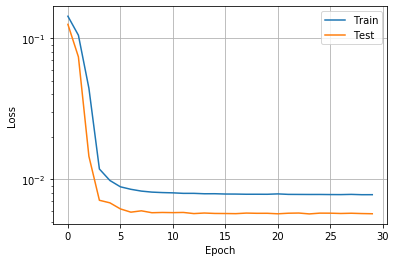

SR: 2.651296915155333                                                             
Testing Parameters: {'adr_period': 69, 'roc_period': 51}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 42%|████▏     | 42/100 [06:25<08:32,  8.84s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

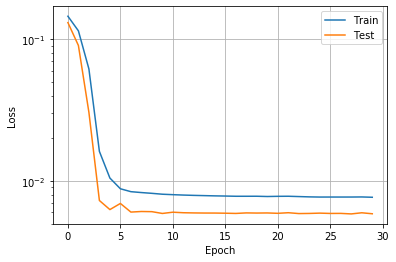

SR: 2.8285123709134967                                                            
Testing Parameters: {'adr_period': 52, 'roc_period': 70}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 43%|████▎     | 43/100 [06:31<07:45,  8.17s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

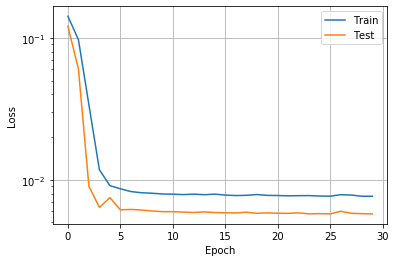

SR: 3.546469930833371                                                             
Testing Parameters: {'adr_period': 41, 'roc_period': 96}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 44%|████▍     | 44/100 [06:42<08:27,  9.06s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

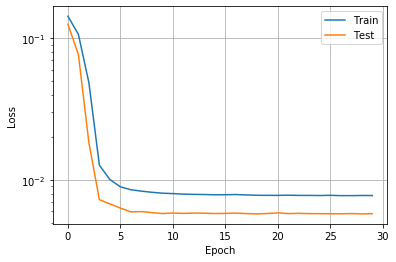

SR: 4.067743982080501                                                             
Testing Parameters: {'adr_period': 98, 'roc_period': 32}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 45%|████▌     | 45/100 [06:50<07:59,  8.71s/trial, best loss: -5.377412450376564]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

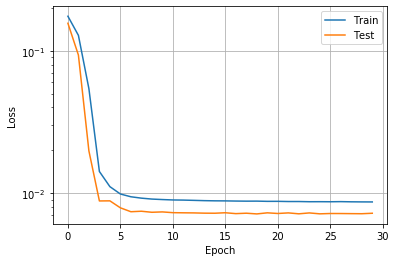

*** SR Improved!!! ***                                                            
SR: 7.21728870324289                                                              
Testing Parameters: {'adr_period': 90, 'roc_period': 30}                          
Using loaded prices for 2021-03-28                                               
*** Training model with 32 units per layer ***                                   
 46%|████▌     | 46/100 [06:59<07:53,  8.76s/trial, best loss: -7.21728870324289]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHU

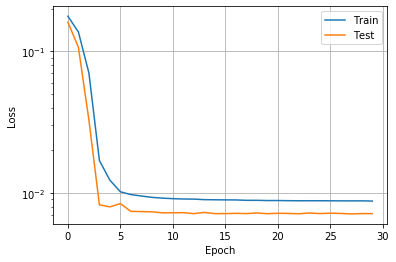

SR: 3.1456396545701995                                                           
Testing Parameters: {'adr_period': 92, 'roc_period': 22}                         
Using loaded prices for 2021-03-28                                               
*** Training model with 32 units per layer ***                                   
 47%|████▋     | 47/100 [07:08<07:50,  8.88s/trial, best loss: -7.21728870324289]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/asse

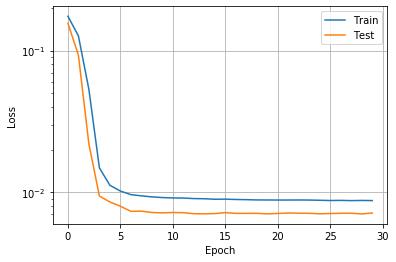

SR: 4.735432122954504                                                            
Testing Parameters: {'adr_period': 83, 'roc_period': 13}                         
Using loaded prices for 2021-03-28                                               
*** Training model with 32 units per layer ***                                   
 48%|████▊     | 48/100 [07:17<07:36,  8.78s/trial, best loss: -7.21728870324289]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/asse

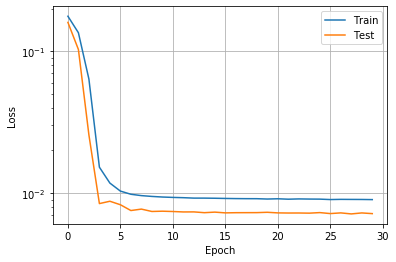

SR: 5.309769757163152                                                            
Testing Parameters: {'adr_period': 97, 'roc_period': 80}                         
Using loaded prices for 2021-03-28                                               
*** Training model with 32 units per layer ***                                   
 49%|████▉     | 49/100 [07:26<07:40,  9.02s/trial, best loss: -7.21728870324289]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/asse

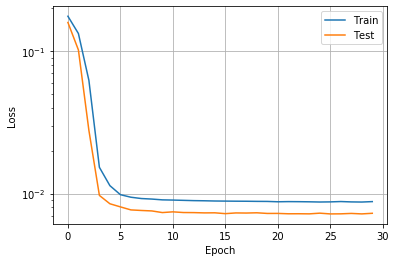

SR: 6.883295394823032                                                            
Testing Parameters: {'adr_period': 95, 'roc_period': 26}                         
Using loaded prices for 2021-03-28                                               
*** Training model with 32 units per layer ***                                   
 50%|█████     | 50/100 [07:36<07:40,  9.21s/trial, best loss: -7.21728870324289]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/asse

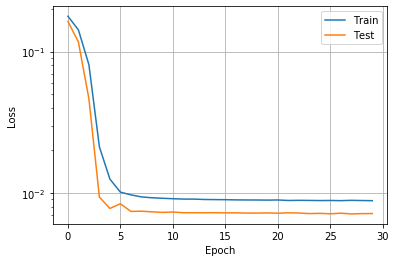

SR: 4.487630727381396                                                            
Testing Parameters: {'adr_period': 97, 'roc_period': 17}                         
Using loaded prices for 2021-03-28                                               
*** Training model with 32 units per layer ***                                   
 51%|█████     | 51/100 [07:46<07:44,  9.49s/trial, best loss: -7.21728870324289]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/asse

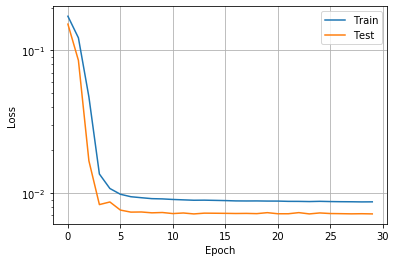

*** SR Improved!!! ***                                                           
SR: 9.281868926926775                                                            
Testing Parameters: {'adr_period': 79, 'roc_period': 3}                           
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 52%|█████▏    | 52/100 [07:53<06:54,  8.63s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETH

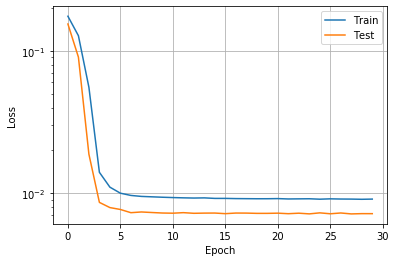

SR: 3.629319394934895                                                             
Testing Parameters: {'adr_period': 98, 'roc_period': 19}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 53%|█████▎    | 53/100 [08:01<06:46,  8.64s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

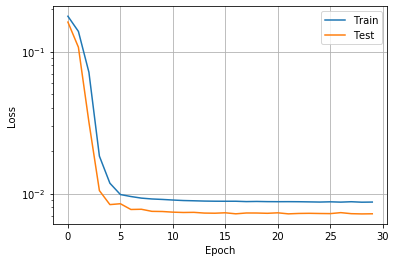

SR: 6.443763110914665                                                             
Testing Parameters: {'adr_period': 100, 'roc_period': 2}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 54%|█████▍    | 54/100 [08:10<06:41,  8.73s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

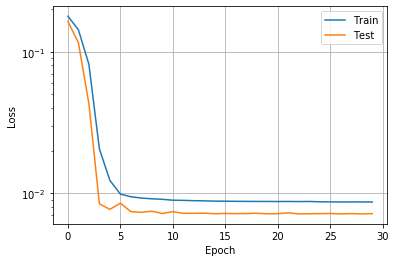

SR: 7.565331252343453                                                             
Testing Parameters: {'adr_period': 86, 'roc_period': 11}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 55%|█████▌    | 55/100 [08:18<06:23,  8.51s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

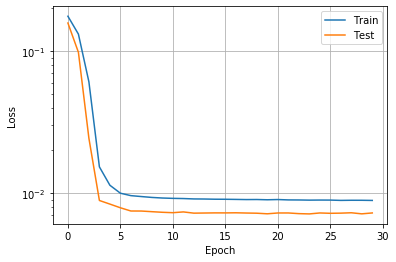

SR: 2.5211040726843432                                                            
Testing Parameters: {'adr_period': 79, 'roc_period': 7}                           
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 56%|█████▌    | 56/100 [08:28<06:23,  8.73s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

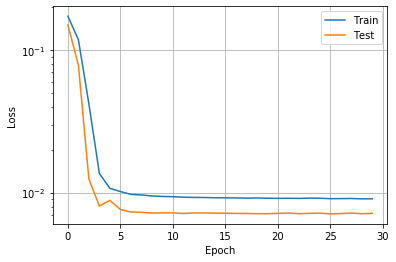

SR: 3.6893468187310425                                                            
Testing Parameters: {'adr_period': 88, 'roc_period': 2}                           
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 57%|█████▋    | 57/100 [08:35<06:02,  8.44s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

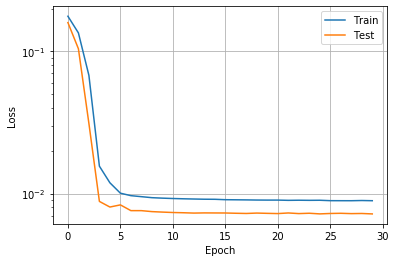

SR: 2.379333499040763                                                             
Testing Parameters: {'adr_period': 72, 'roc_period': 17}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 58%|█████▊    | 58/100 [08:46<06:21,  9.07s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

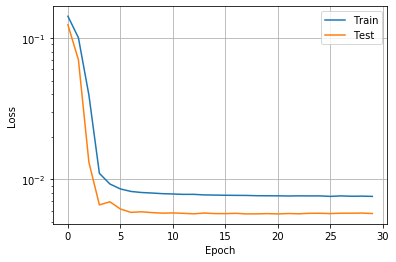

SR: 3.8894465072342546                                                            
Testing Parameters: {'adr_period': 82, 'roc_period': 9}                           
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 59%|█████▉    | 59/100 [08:54<05:56,  8.69s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

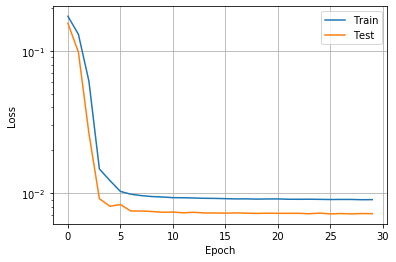

SR: 2.858116928501632                                                             
Testing Parameters: {'adr_period': 92, 'roc_period': 5}                           
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 60%|██████    | 60/100 [09:03<05:58,  8.96s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

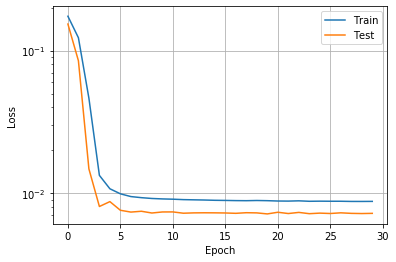

SR: 5.4909429995947345                                                            
Testing Parameters: {'adr_period': 65, 'roc_period': 25}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 61%|██████    | 61/100 [09:10<05:25,  8.35s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

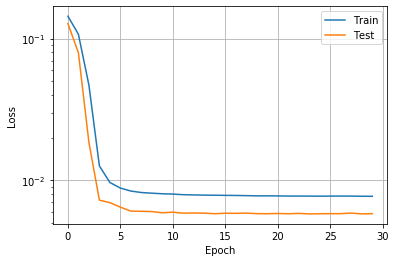

SR: 2.8375726382415634                                                            
Testing Parameters: {'adr_period': 89, 'roc_period': 14}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 62%|██████▏   | 62/100 [09:20<05:31,  8.73s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

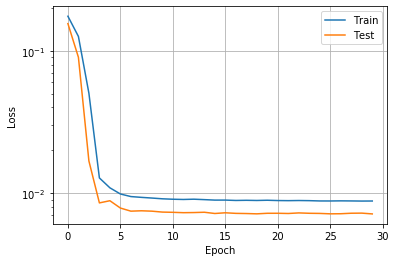

SR: 4.565745896825529                                                             
Testing Parameters: {'adr_period': 99, 'roc_period': 35}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 63%|██████▎   | 63/100 [09:29<05:23,  8.73s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets


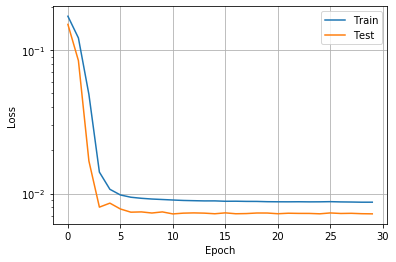

SR: 7.610519497811716                                                             
Testing Parameters: {'adr_period': 77, 'roc_period': 34}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 64%|██████▍   | 64/100 [09:35<04:46,  7.96s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

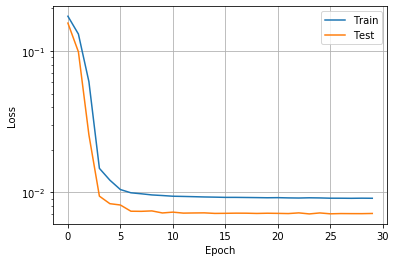

SR: 3.962143634339721                                                             
Testing Parameters: {'adr_period': 92, 'roc_period': 37}                          
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 65%|██████▌   | 65/100 [09:44<04:47,  8.22s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

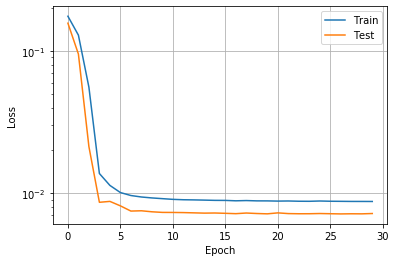

SR: 3.9302841273613653                                                            
Testing Parameters: {'adr_period': 100, 'roc_period': 28}                         
Using loaded prices for 2021-03-28                                                
*** Training model with 32 units per layer ***                                    
 66%|██████▌   | 66/100 [09:53<04:54,  8.66s/trial, best loss: -9.281868926926775]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn

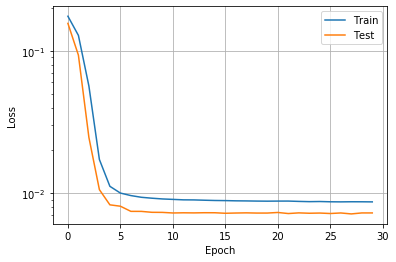

*** SR Improved!!! ***                                                            
SR: 10.076626632153763                                                            
Testing Parameters: {'adr_period': 99, 'roc_period': 29}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 67%|██████▋   | 67/100 [10:02<04:46,  8.69s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: da

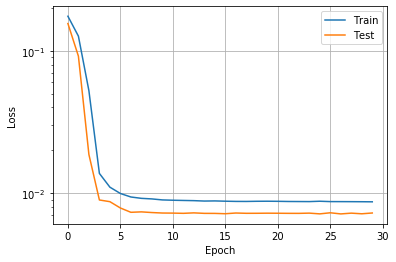

SR: 7.798159810801356                                                              
Testing Parameters: {'adr_period': 81, 'roc_period': 41}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 68%|██████▊   | 68/100 [10:11<04:45,  8.93s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

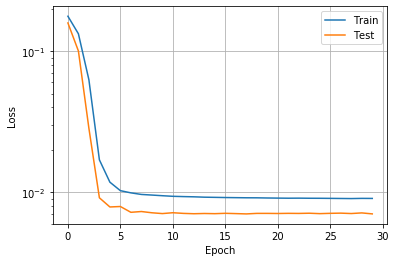

SR: 5.993988665447425                                                              
Testing Parameters: {'adr_period': 86, 'roc_period': 22}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 69%|██████▉   | 69/100 [10:19<04:19,  8.39s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

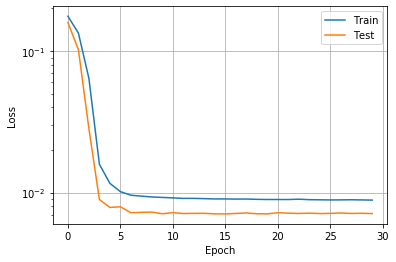

SR: 4.379862267536591                                                              
Testing Parameters: {'adr_period': 95, 'roc_period': 30}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 70%|███████   | 70/100 [10:25<03:54,  7.82s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

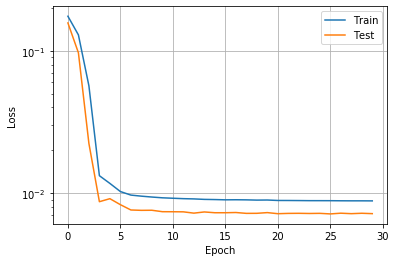

SR: 3.9589827762745657                                                             
Testing Parameters: {'adr_period': 94, 'roc_period': 19}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 71%|███████   | 71/100 [10:34<03:55,  8.13s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

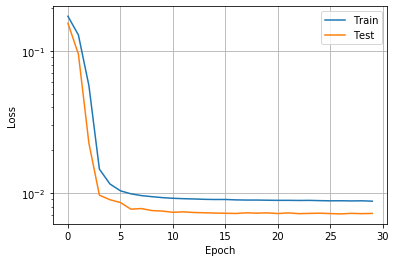

SR: 4.027628574199392                                                              
Testing Parameters: {'adr_period': 87, 'roc_period': 27}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 72%|███████▏  | 72/100 [10:44<04:07,  8.82s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

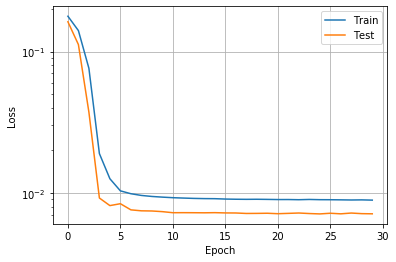

SR: 3.567383434570092                                                              
Testing Parameters: {'adr_period': 72, 'roc_period': 44}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 73%|███████▎  | 73/100 [10:54<04:07,  9.18s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

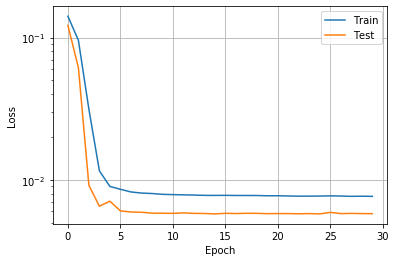

SR: 2.987113655136056                                                              
Testing Parameters: {'adr_period': 90, 'roc_period': 55}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 74%|███████▍  | 74/100 [11:03<03:52,  8.94s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

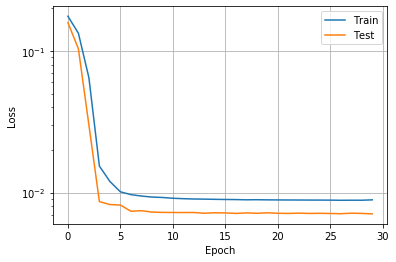

SR: 4.2893893701500145                                                             
Testing Parameters: {'adr_period': 76, 'roc_period': 16}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 75%|███████▌  | 75/100 [11:13<03:50,  9.23s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

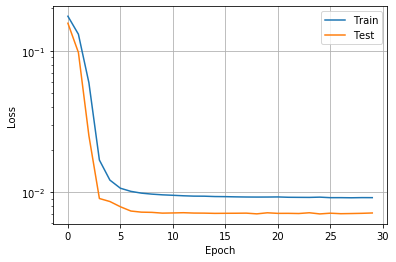

SR: 4.617243315141238                                                              
Testing Parameters: {'adr_period': 100, 'roc_period': 50}                          
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 76%|███████▌  | 76/100 [11:21<03:38,  9.09s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

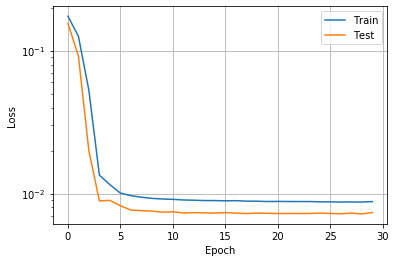

SR: 4.32092726073408                                                               
Testing Parameters: {'adr_period': 68, 'roc_period': 30}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 77%|███████▋  | 77/100 [11:31<03:30,  9.14s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

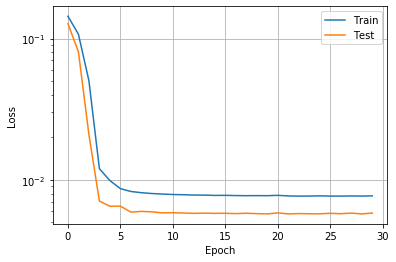

SR: 5.500688769309154                                                              
Testing Parameters: {'adr_period': 60, 'roc_period': 42}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 78%|███████▊  | 78/100 [11:40<03:18,  9.05s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

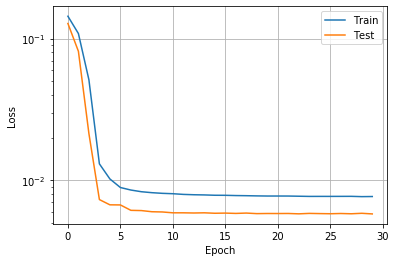

SR: 3.9809111782887645                                                             
Testing Parameters: {'adr_period': 72, 'roc_period': 37}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 79%|███████▉  | 79/100 [11:50<03:18,  9.44s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

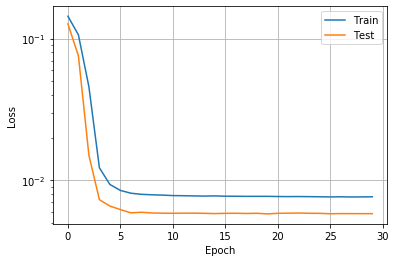

SR: 3.939582930817428                                                              
Testing Parameters: {'adr_period': 84, 'roc_period': 23}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 80%|████████  | 80/100 [11:58<03:02,  9.11s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

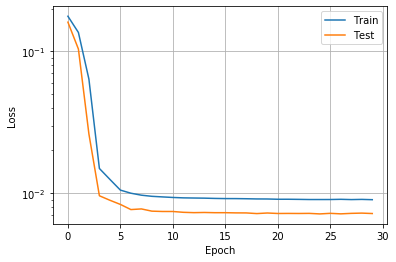

SR: 6.673793332881264                                                              
Testing Parameters: {'adr_period': 97, 'roc_period': 11}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 81%|████████  | 81/100 [12:08<02:58,  9.38s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

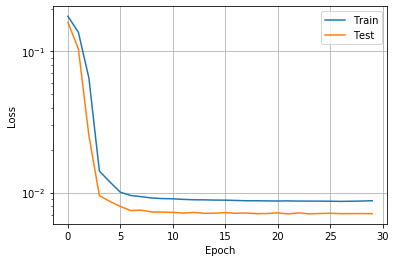

SR: 6.435648844928014                                                              
Testing Parameters: {'adr_period': 79, 'roc_period': 19}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 82%|████████▏ | 82/100 [12:17<02:45,  9.20s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

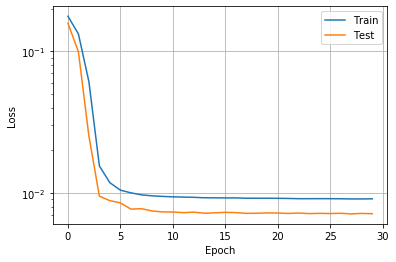

SR: 3.704044951174054                                                              
Testing Parameters: {'adr_period': 33, 'roc_period': 29}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 83%|████████▎ | 83/100 [12:27<02:38,  9.32s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

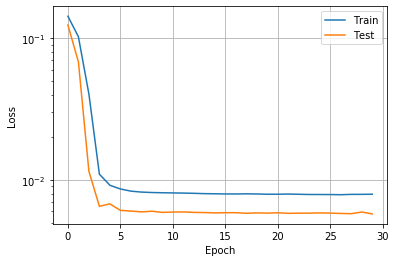

SR: 3.096393087309253                                                              
Testing Parameters: {'adr_period': 2, 'roc_period': 46}                            
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 84%|████████▍ | 84/100 [12:36<02:27,  9.24s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

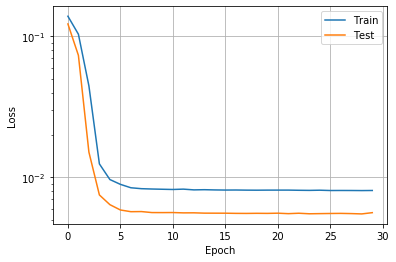

SR: 3.344138442932777                                                              
Testing Parameters: {'adr_period': 26, 'roc_period': 62}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 85%|████████▌ | 85/100 [12:46<02:25,  9.67s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

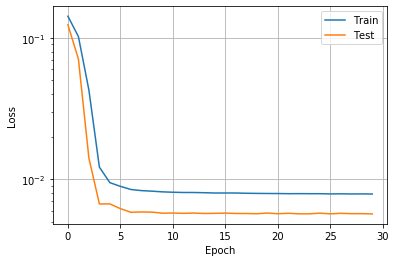

SR: 3.186889722540826                                                              
Testing Parameters: {'adr_period': 93, 'roc_period': 25}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 86%|████████▌ | 86/100 [12:56<02:16,  9.75s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

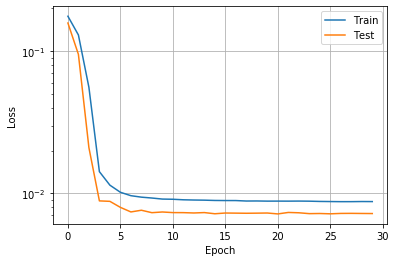

SR: 6.812520618731908                                                              
Testing Parameters: {'adr_period': 63, 'roc_period': 48}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 87%|████████▋ | 87/100 [13:04<01:57,  9.07s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

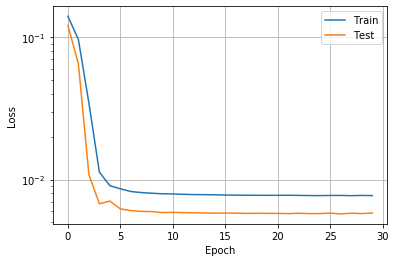

SR: 3.241287271356527                                                              
Testing Parameters: {'adr_period': 81, 'roc_period': 4}                            
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 88%|████████▊ | 88/100 [13:14<01:53,  9.49s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

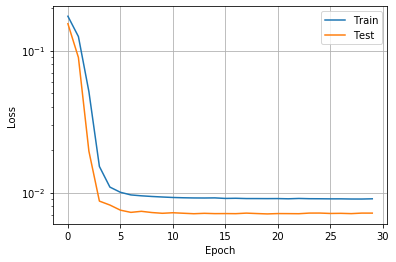

SR: 3.724765638052721                                                              
Testing Parameters: {'adr_period': 10, 'roc_period': 39}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 89%|████████▉ | 89/100 [13:22<01:38,  8.94s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

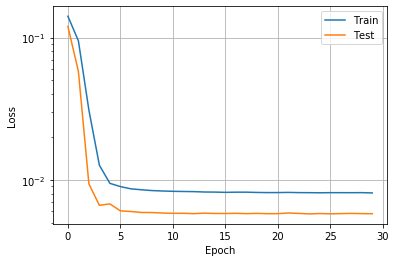

SR: 2.2887044444148623                                                             
Testing Parameters: {'adr_period': 96, 'roc_period': 15}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 90%|█████████ | 90/100 [13:31<01:28,  8.85s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

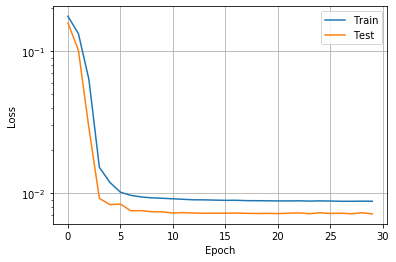

SR: 8.48448334897538                                                               
Testing Parameters: {'adr_period': 16, 'roc_period': 7}                            
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 91%|█████████ | 91/100 [13:40<01:21,  9.08s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

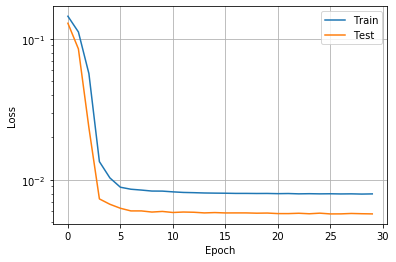

SR: 3.6066484159509016                                                             
Testing Parameters: {'adr_period': 90, 'roc_period': 14}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 92%|█████████▏| 92/100 [13:50<01:15,  9.45s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

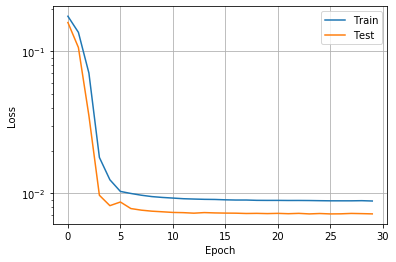

SR: 2.85373297813647                                                               
Testing Parameters: {'adr_period': 55, 'roc_period': 10}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 93%|█████████▎| 93/100 [14:01<01:08,  9.76s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

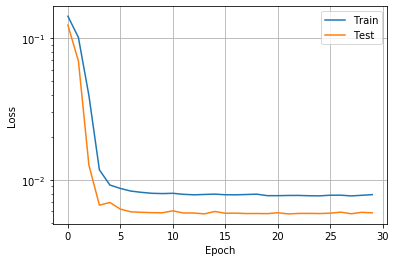

SR: 2.355129679817232                                                              
Testing Parameters: {'adr_period': 66, 'roc_period': 20}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 94%|█████████▍| 94/100 [14:09<00:55,  9.23s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

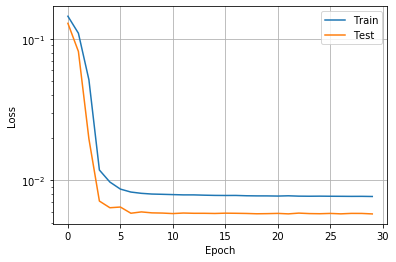

SR: 4.443900170045188                                                              
Testing Parameters: {'adr_period': 58, 'roc_period': 16}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 95%|█████████▌| 95/100 [14:16<00:42,  8.55s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

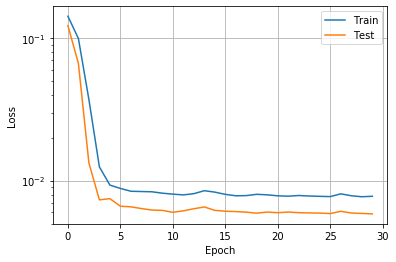

SR: 7.191515436939894                                                              
Testing Parameters: {'adr_period': 96, 'roc_period': 32}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 96%|█████████▌| 96/100 [14:24<00:33,  8.47s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

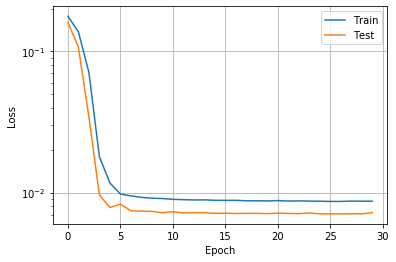

SR: 7.661612829868066                                                              
Testing Parameters: {'adr_period': 74, 'roc_period': 36}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 97%|█████████▋| 97/100 [14:34<00:26,  8.93s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

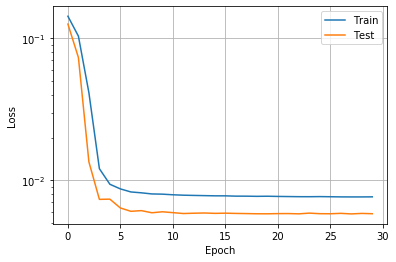

SR: 3.5941772058925934                                                             
Testing Parameters: {'adr_period': 77, 'roc_period': 12}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 98%|█████████▊| 98/100 [14:43<00:17,  8.75s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

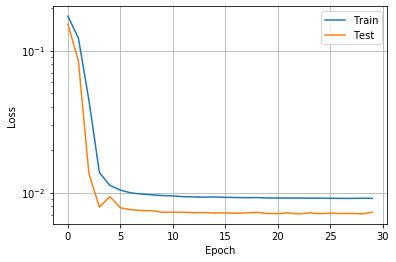

SR: 6.4179668753344785                                                             
Testing Parameters: {'adr_period': 50, 'roc_period': 23}                           
Using loaded prices for 2021-03-28                                                 
*** Training model with 32 units per layer ***                                     
 99%|█████████▉| 99/100 [14:52<00:09,  9.02s/trial, best loss: -10.076626632153763]INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/model.nn/assets
INFO:tensorflow:Assets written to: data/ETHUSDNN2/mod

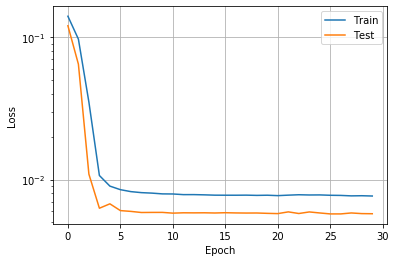

SR: 3.7724927374334976                                                             
100%|██████████| 100/100 [14:59<00:00,  8.99s/trial, best loss: -10.076626632153763]


In [30]:
p.datasource = 'cc'
p.model = p.cfgdir+'/model.nn'
p.reload = False
p.charts = False
p.stats = False
p.train = True
p.train_pct = 0.8
p.test_pct = 0.2
p.epochs = 30
p.batch_size = 100
p.top_sr = 0

trials = Trials()

best = fmin(
    fn=f,
    space=space,
    algo=tpe.suggest,
    trials=trials,
    max_evals=100
)

In [108]:
# Best: 19
best

{'adr_period': 19.0}

In [32]:
shutil.move(p.cfgdir + '/top_sc.dmp', p.cfgdir + '/sc.dmp')
shutil.move(p.cfgdir + '/top_sc1.dmp', p.cfgdir + '/sc1.dmp')

'data/ETHUSDNN2/sc1.dmp'

In [33]:
p.train = False
p.model = p.cfgdir+'/top_model.nn'
p.test_pct = 0.2
p.charts = True
p.stats = True

Using loaded prices for 2020-10-06


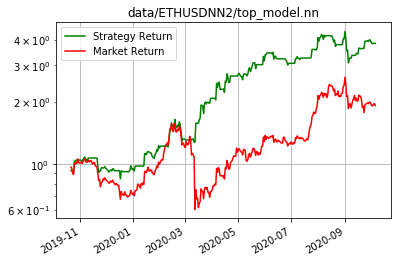

Strategy Return: 3.84
Market Return: 1.91
Sortino Ratio: 4.14
Bars in Trade: 3
Buy Pct: 0.53
Accuracy: 0.57
Win Ratio: 0.59
Avg Win: 0.04
Avg Loss: 0.02
Risk to Reward: 1.76
Expectancy: 1.59
Sharpe Ratio: 2.24
Average Daily Return: 0.004
SL: 0.00 TP: 0.00


3.835512372276387

In [110]:
runNN2(int(best['adr_period']))

Using loaded prices for 2020-10-06


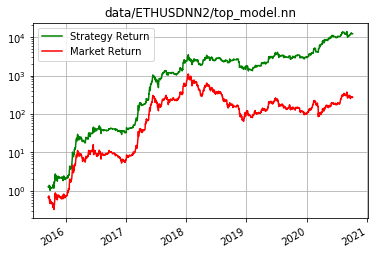

Strategy Return: 12149.37
Market Return: 271.32
Sortino Ratio: 4.10
Bars in Trade: 4
Buy Pct: 0.58
Accuracy: 0.57
Win Ratio: 0.62
Avg Win: 0.07
Avg Loss: 0.03
Risk to Reward: 2.19
Expectancy: 3.10
Sharpe Ratio: 2.29
Average Daily Return: 0.008
SL: 0.00 TP: 0.00


12149.374766194425

In [111]:
p.test_pct = 1
runNN2(int(best['adr_period']))

# Tuning Risk Model

In [32]:
p.load_config('ETHUSDNN1')


**************** Loaded Config for ETHUSDNN1 ****************


Loaded ETHUSD prices from KRAKEN via cc Rows:1907 Date:2020-10-25 00:00:00
Last complete day close: 412.38
Loaded ETHBTC prices from KRAKEN via cc Rows:1907 Date:2020-10-25 00:00:00
Last complete day close: 0.03141


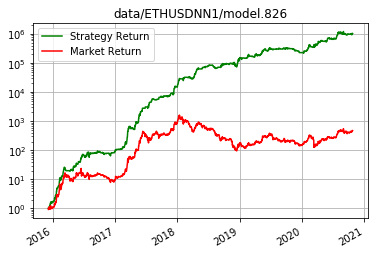

Strategy Return: 1040829.50
Market Return: 474.70
Sortino Ratio: 8.26
Bars in Trade: 3
Buy Pct: 0.54
Accuracy: 0.58
Win Ratio: 0.60
Avg Win: 0.07
Avg Loss: 0.02
Risk to Reward: 3.62
Expectancy: 3.66
Sharpe Ratio: 3.63
Average Daily Return: 0.010
SL: 0.00 TP: 0.00


In [34]:
p.datasource = 'cc'
td = nn.runNN1()

In [37]:
td[td.y_pred].SR.prod()

1040829.5033152888

Loaded ETHUSD prices from KRAKEN via cc Rows:1907 Date:2020-10-25 00:00:00
Last complete day close: 412.38
Loaded ETHBTC prices from KRAKEN via cc Rows:1907 Date:2020-10-25 00:00:00
Last complete day close: 0.03141


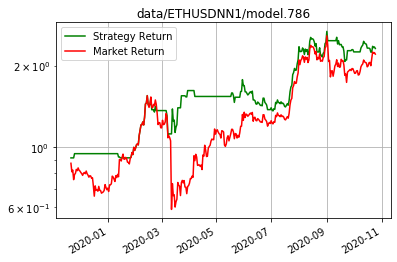

Strategy Return: 2.31
Market Return: 2.20
Sortino Ratio: 2.93
Bars in Trade: 6
Buy Pct: 0.47
Accuracy: 0.51
Win Ratio: 0.33
Avg Win: 0.10
Avg Loss: 0.02
Risk to Reward: 4.82
Expectancy: 1.24
Sharpe Ratio: 1.70
Average Daily Return: 0.003
SL: 0.00 TP: 0.00


In [28]:
p.test_pct = 0.2
td = nn.runNN1()

Loaded ETHUSD prices from KRAKEN via cc Rows:1907 Date:2020-10-25 00:00:00
Last complete day close: 412.38
Loaded ETHBTC prices from KRAKEN via cc Rows:1907 Date:2020-10-25 00:00:00
Last complete day close: 0.03141


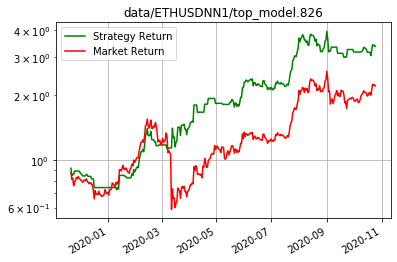

Strategy Return: 3.36
Market Return: 2.20
Sortino Ratio: 3.88
Bars in Trade: 4
Buy Pct: 0.59
Accuracy: 0.52
Win Ratio: 0.51
Avg Win: 0.06
Avg Loss: 0.02
Risk to Reward: 2.47
Expectancy: 1.59
Sharpe Ratio: 2.12
Average Daily Return: 0.004
SL: 0.00 TP: 0.00


In [29]:
p.model = p.cfgdir+'/model.826'
td1 = nn.runNN1()

Loaded ETHUSD prices from KRAKEN via kr Rows:720 Date:2020-10-25 00:00:00
Last complete day close: 412.38
Loaded ETHBTC prices from KRAKEN via kr Rows:720 Date:2020-10-25 00:00:00
Last complete day close: 0.03141


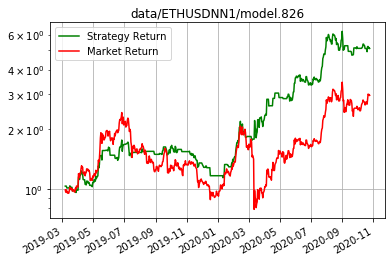

Strategy Return: 5.11
Market Return: 2.97
Sortino Ratio: 3.31
Bars in Trade: 4
Buy Pct: 0.52
Accuracy: 0.53
Win Ratio: 0.51
Avg Win: 0.04
Avg Loss: 0.02
Risk to Reward: 2.14
Expectancy: 1.23
Sharpe Ratio: 1.84
Average Daily Return: 0.003
SL: 0.00 TP: 0.00


In [33]:
p.test_pct = 1
td1 = nn.runNN1()

In [6]:
space = {
    'adx_period': scope.int(hp.quniform('adx_period', 2, 10, 1))
}

In [7]:
def f(space):
    print('Testing Parameters: '+str(space))
    sr = nn.runNN1().CSR.iloc[-1]
    
    if sr > p.top_sr:
        print('*** SR Improved!!! ***')
        mpath = p.cfgdir+'/top_model.nn'
        if os.path.exists(mpath):
            shutil.rmtree(mpath) 
        shutil.move(p.model, mpath)
        shutil.move(p.cfgdir + '/sc.dmp', p.cfgdir + '/top_sc.dmp')
        shutil.move(p.cfgdir + '/sc1.dmp', p.cfgdir + '/top_sc1.dmp')
        p.top_sr = sr
    
    print('SR: '+str(sr))
    return -sr

Testing Parameters: {'adx_period': 6}                 
Using loaded prices for 2020-10-25                    
Using loaded prices for 2020-10-25                    
*** Training model with 32 units per layer ***        
                                                      
Epoch 00001: val_loss improved from inf to 0.15463, saving model to data/ETHUSDNN1/model.nn
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                      
Epoch 00002: val_loss improved from 0.15463 to 0.09888, saving model to data/ETHUSDNN1/model.nn
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                      
Epoch 00003: val_loss improved from 0.09888 to 0.02876, saving model to data/ETHUSDNN1/model.nn
  0%|          | 0/10 [00:01<?, ?trial/s, best loss=?]INFO:tensorflow:Assets written to: da

                                                      
Epoch 00047: val_loss did not improve from 0.00670
                                                      
Epoch 00048: val_loss did not improve from 0.00670
                                                      
Epoch 00049: val_loss did not improve from 0.00670
                                                      
Epoch 00050: val_loss did not improve from 0.00670
                                                      
Epoch 00051: val_loss did not improve from 0.00670
                                                      
Epoch 00052: val_loss improved from 0.00670 to 0.00665, saving model to data/ETHUSDNN1/model.nn
  0%|          | 0/10 [00:10<?, ?trial/s, best loss=?]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                      
Epoch 00053: val_loss did not improve from 0.00665
                                                      
Epoch 00054: val_loss did not improve 

                                                      
Epoch 00115: val_loss did not improve from 0.00642
                                                      
Epoch 00116: val_loss did not improve from 0.00642
                                                      
Epoch 00117: val_loss did not improve from 0.00642
                                                      
Epoch 00118: val_loss improved from 0.00642 to 0.00640, saving model to data/ETHUSDNN1/model.nn
  0%|          | 0/10 [00:15<?, ?trial/s, best loss=?]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                      
Epoch 00119: val_loss did not improve from 0.00640
                                                      
Epoch 00120: val_loss did not improve from 0.00640
                                                      
Epoch 00121: val_loss did not improve from 0.00640
                                                      
Epoch 00122: val_loss did not improve 

                                                      
Epoch 00191: val_loss did not improve from 0.00640
                                                      
Epoch 00192: val_loss did not improve from 0.00640
                                                      
Epoch 00193: val_loss did not improve from 0.00640
                                                      
Epoch 00194: val_loss did not improve from 0.00640
                                                      
Epoch 00195: val_loss did not improve from 0.00640
                                                      
Epoch 00196: val_loss did not improve from 0.00640
                                                      
Epoch 00197: val_loss did not improve from 0.00640
                                                      
Epoch 00198: val_loss did not improve from 0.00640
                                                      
Epoch 00199: val_loss did not improve from 0.00640
                                              

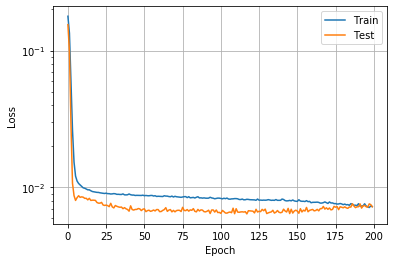

*** SR Improved!!! ***                                
SR: 2.9034944998129717                                
Testing Parameters: {'adx_period': 3}                                            
Using loaded prices for 2020-10-25                                               
Using loaded prices for 2020-10-25                                               
*** Training model with 32 units per layer ***                                   
                                                                                 
Epoch 00001: val_loss improved from inf to 0.15240, saving model to data/ETHUSDNN1/model.nn
 10%|█         | 1/10 [00:19<02:49, 18.84s/trial, best loss: -2.9034944998129717]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                 
Epoch 00002: val_loss improved from 0.15240 to 0.09135, saving model to data/ETHUSDNN1/model.nn
 10%|█         | 1/10 [00:19<02:49, 18.84s/trial, best loss: -2

                                                                                 
Epoch 00083: val_loss did not improve from 0.00626
                                                                                 
Epoch 00084: val_loss did not improve from 0.00626
                                                                                 
Epoch 00085: val_loss did not improve from 0.00626
                                                                                 
Epoch 00086: val_loss improved from 0.00626 to 0.00624, saving model to data/ETHUSDNN1/model.nn
 10%|█         | 1/10 [00:33<02:49, 18.84s/trial, best loss: -2.9034944998129717]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                 
Epoch 00087: val_loss did not improve from 0.00624
                                                                                 
Epoch 00088: val_loss did not improve from 0.00624
          

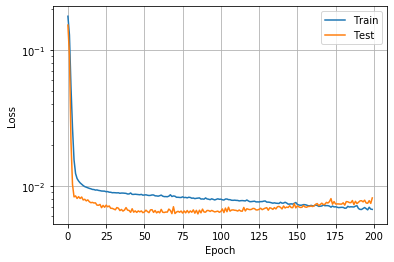

*** SR Improved!!! ***                                                           
SR: 3.631950410758106                                                            
Testing Parameters: {'adx_period': 7}                                            
Using loaded prices for 2020-10-25                                              
Using loaded prices for 2020-10-25                                              
*** Training model with 32 units per layer ***                                  
                                                                                
Epoch 00001: val_loss improved from inf to 0.15031, saving model to data/ETHUSDNN1/model.nn
 20%|██        | 2/10 [00:38<02:31, 18.93s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                
Epoch 00002: val_loss improved from 0.15031 to 0.08814, saving model to data/ETHUSDNN1/model.nn
 20%|██        

                                                                                
Epoch 00082: val_loss did not improve from 0.00642
                                                                                
Epoch 00083: val_loss did not improve from 0.00642
                                                                                
Epoch 00084: val_loss did not improve from 0.00642
                                                                                
Epoch 00085: val_loss did not improve from 0.00642
                                                                                
Epoch 00086: val_loss did not improve from 0.00642
                                                                                
Epoch 00087: val_loss did not improve from 0.00642
                                                                                
Epoch 00088: val_loss did not improve from 0.00642
                                                                            

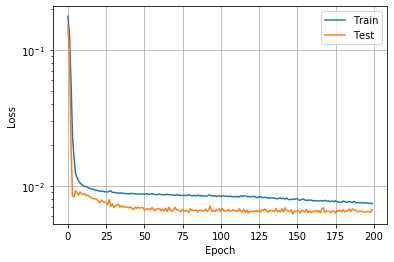

SR: 1.7607469642662539                                                          
Testing Parameters: {'adx_period': 7}                                           
Using loaded prices for 2020-10-25                                              
Using loaded prices for 2020-10-25                                              
*** Training model with 32 units per layer ***                                  
                                                                                
Epoch 00001: val_loss improved from inf to 0.15441, saving model to data/ETHUSDNN1/model.nn
 30%|███       | 3/10 [00:58<02:15, 19.32s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                
Epoch 00002: val_loss improved from 0.15441 to 0.09588, saving model to data/ETHUSDNN1/model.nn
 30%|███       | 3/10 [00:59<02:15, 19.32s/trial, best loss: -3.631950410758106]INFO:tensorflow:Ass

                                                                                
Epoch 00088: val_loss did not improve from 0.00651
                                                                                
Epoch 00089: val_loss did not improve from 0.00651
                                                                                
Epoch 00090: val_loss did not improve from 0.00651
                                                                                
Epoch 00091: val_loss did not improve from 0.00651
                                                                                
Epoch 00092: val_loss did not improve from 0.00651
                                                                                
Epoch 00093: val_loss did not improve from 0.00651
                                                                                
Epoch 00094: val_loss did not improve from 0.00651
                                                                            

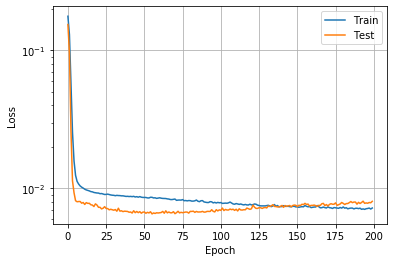

SR: 1.5211387835445203                                                          
Testing Parameters: {'adx_period': 10}                                          
Using loaded prices for 2020-10-25                                              
Using loaded prices for 2020-10-25                                              
*** Training model with 32 units per layer ***                                  
                                                                                
Epoch 00001: val_loss improved from inf to 0.15188, saving model to data/ETHUSDNN1/model.nn
 40%|████      | 4/10 [01:15<01:52, 18.70s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                
Epoch 00002: val_loss improved from 0.15188 to 0.08954, saving model to data/ETHUSDNN1/model.nn
 40%|████      | 4/10 [01:16<01:52, 18.70s/trial, best loss: -3.631950410758106]INFO:tensorflow:Ass

                                                                                
Epoch 00034: val_loss did not improve from 0.00687
                                                                                
Epoch 00035: val_loss did not improve from 0.00687
                                                                                
Epoch 00036: val_loss improved from 0.00687 to 0.00685, saving model to data/ETHUSDNN1/model.nn
 40%|████      | 4/10 [01:24<01:52, 18.70s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                
Epoch 00037: val_loss did not improve from 0.00685
                                                                                
Epoch 00038: val_loss did not improve from 0.00685
                                                                                
Epoch 00039: val_loss improved from 0.00685 to 0.00677, saving model

                                                                                
Epoch 00144: val_loss did not improve from 0.00643
                                                                                
Epoch 00145: val_loss did not improve from 0.00643
                                                                                
Epoch 00146: val_loss did not improve from 0.00643
                                                                                
Epoch 00147: val_loss did not improve from 0.00643
                                                                                
Epoch 00148: val_loss did not improve from 0.00643
                                                                                
Epoch 00149: val_loss did not improve from 0.00643
                                                                                
Epoch 00150: val_loss did not improve from 0.00643
                                                                            

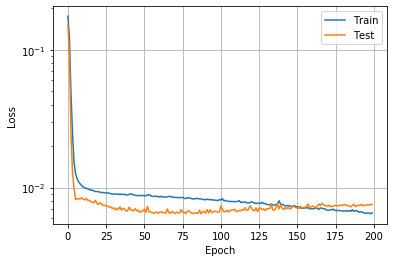

SR: 2.2935677718927967                                                          
Testing Parameters: {'adx_period': 8}                                           
Using loaded prices for 2020-10-25                                              
Using loaded prices for 2020-10-25                                              
*** Training model with 32 units per layer ***                                  
                                                                                
Epoch 00001: val_loss improved from inf to 0.14945, saving model to data/ETHUSDNN1/model.nn
 50%|█████     | 5/10 [01:35<01:34, 18.90s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                
Epoch 00002: val_loss improved from 0.14945 to 0.08773, saving model to data/ETHUSDNN1/model.nn
 50%|█████     | 5/10 [01:35<01:34, 18.90s/trial, best loss: -3.631950410758106]INFO:tensorflow:Ass

                                                                                
Epoch 00034: val_loss did not improve from 0.00673
                                                                                
Epoch 00035: val_loss did not improve from 0.00673
                                                                                
Epoch 00036: val_loss did not improve from 0.00673
                                                                                
Epoch 00037: val_loss did not improve from 0.00673
                                                                                
Epoch 00038: val_loss did not improve from 0.00673
                                                                                
Epoch 00039: val_loss did not improve from 0.00673
                                                                                
Epoch 00040: val_loss improved from 0.00673 to 0.00652, saving model to data/ETHUSDNN1/model.nn
 50%|█████     | 5/10 [01:44<01

                                                                                
Epoch 00089: val_loss did not improve from 0.00635
                                                                                
Epoch 00090: val_loss did not improve from 0.00635
                                                                                
Epoch 00091: val_loss did not improve from 0.00635
                                                                                
Epoch 00092: val_loss did not improve from 0.00635
                                                                                
Epoch 00093: val_loss did not improve from 0.00635
                                                                                
Epoch 00094: val_loss did not improve from 0.00635
                                                                                
Epoch 00095: val_loss did not improve from 0.00635
                                                                            

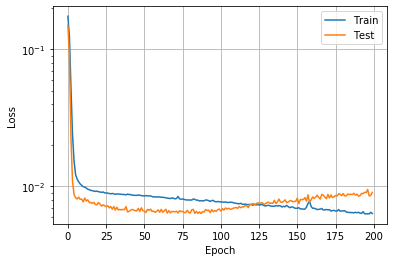

SR: 2.9800267465980075                                                          
Testing Parameters: {'adx_period': 2}                                           
Using loaded prices for 2020-10-25                                              
Using loaded prices for 2020-10-25                                              
*** Training model with 32 units per layer ***                                  
                                                                                
Epoch 00001: val_loss improved from inf to 0.15373, saving model to data/ETHUSDNN1/model.nn
 60%|██████    | 6/10 [01:52<01:13, 18.43s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                
Epoch 00002: val_loss improved from 0.15373 to 0.09469, saving model to data/ETHUSDNN1/model.nn
 60%|██████    | 6/10 [01:53<01:13, 18.43s/trial, best loss: -3.631950410758106]INFO:tensorflow:Ass

                                                                                
Epoch 00088: val_loss did not improve from 0.00612
                                                                                
Epoch 00089: val_loss did not improve from 0.00612
                                                                                
Epoch 00090: val_loss did not improve from 0.00612
                                                                                
Epoch 00091: val_loss did not improve from 0.00612
                                                                                
Epoch 00092: val_loss did not improve from 0.00612
                                                                                
Epoch 00093: val_loss did not improve from 0.00612
                                                                                
Epoch 00094: val_loss did not improve from 0.00612
                                                                            

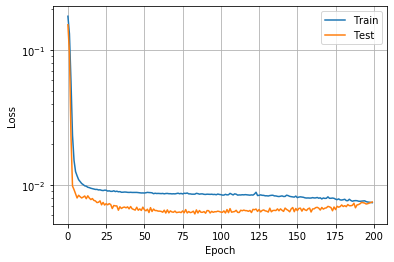

SR: 2.2221596487960573                                                          
Testing Parameters: {'adx_period': 7}                                           
Using loaded prices for 2020-10-25                                              
Using loaded prices for 2020-10-25                                              
*** Training model with 32 units per layer ***                                  
                                                                                
Epoch 00001: val_loss improved from inf to 0.14721, saving model to data/ETHUSDNN1/model.nn
 70%|███████   | 7/10 [02:09<00:54, 18.09s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                
Epoch 00002: val_loss improved from 0.14721 to 0.07710, saving model to data/ETHUSDNN1/model.nn
 70%|███████   | 7/10 [02:10<00:54, 18.09s/trial, best loss: -3.631950410758106]INFO:tensorflow:Ass

                                                                                
Epoch 00084: val_loss did not improve from 0.00640
                                                                                
Epoch 00085: val_loss did not improve from 0.00640
                                                                                
Epoch 00086: val_loss did not improve from 0.00640
                                                                                
Epoch 00087: val_loss did not improve from 0.00640
                                                                                
Epoch 00088: val_loss did not improve from 0.00640
                                                                                
Epoch 00089: val_loss did not improve from 0.00640
                                                                                
Epoch 00090: val_loss did not improve from 0.00640
                                                                            

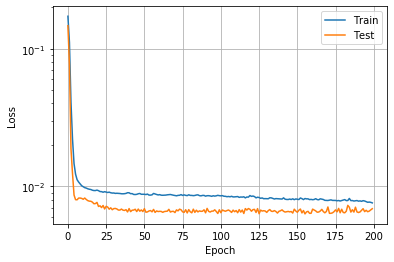

SR: 2.41742736107871                                                            
Testing Parameters: {'adx_period': 9}                                           
Using loaded prices for 2020-10-25                                              
Using loaded prices for 2020-10-25                                              
*** Training model with 32 units per layer ***                                  
                                                                                
Epoch 00001: val_loss improved from inf to 0.15385, saving model to data/ETHUSDNN1/model.nn
 80%|████████  | 8/10 [02:29<00:37, 18.57s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                
Epoch 00002: val_loss improved from 0.15385 to 0.09729, saving model to data/ETHUSDNN1/model.nn
 80%|████████  | 8/10 [02:30<00:37, 18.57s/trial, best loss: -3.631950410758106]INFO:tensorflow:Ass

                                                                                
Epoch 00037: val_loss improved from 0.00707 to 0.00689, saving model to data/ETHUSDNN1/model.nn
 80%|████████  | 8/10 [02:37<00:37, 18.57s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                
Epoch 00038: val_loss did not improve from 0.00689
                                                                                
Epoch 00039: val_loss did not improve from 0.00689
                                                                                
Epoch 00040: val_loss did not improve from 0.00689
                                                                                
Epoch 00041: val_loss improved from 0.00689 to 0.00678, saving model to data/ETHUSDNN1/model.nn
 80%|████████  | 8/10 [02:38<00:37, 18.57s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets w

                                                                                
Epoch 00145: val_loss did not improve from 0.00632
                                                                                
Epoch 00146: val_loss did not improve from 0.00632
                                                                                
Epoch 00147: val_loss did not improve from 0.00632
                                                                                
Epoch 00148: val_loss did not improve from 0.00632
                                                                                
Epoch 00149: val_loss did not improve from 0.00632
                                                                                
Epoch 00150: val_loss did not improve from 0.00632
                                                                                
Epoch 00151: val_loss did not improve from 0.00632
                                                                            

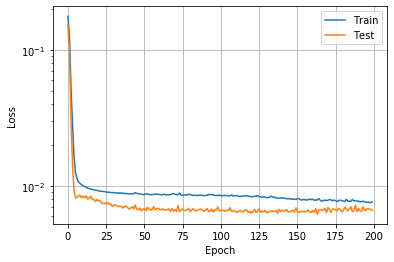

SR: 2.4072220428527253                                                          
Testing Parameters: {'adx_period': 4}                                           
Using loaded prices for 2020-10-25                                              
Using loaded prices for 2020-10-25                                              
*** Training model with 32 units per layer ***                                  
                                                                                
Epoch 00001: val_loss improved from inf to 0.15095, saving model to data/ETHUSDNN1/model.nn
 90%|█████████ | 9/10 [02:49<00:18, 18.84s/trial, best loss: -3.631950410758106]INFO:tensorflow:Assets written to: data/ETHUSDNN1/model.nn/assets
                                                                                
Epoch 00002: val_loss improved from 0.15095 to 0.08659, saving model to data/ETHUSDNN1/model.nn
 90%|█████████ | 9/10 [02:49<00:18, 18.84s/trial, best loss: -3.631950410758106]INFO:tensorflow:Ass

                                                                                
Epoch 00085: val_loss did not improve from 0.00634
                                                                                
Epoch 00086: val_loss did not improve from 0.00634
                                                                                
Epoch 00087: val_loss did not improve from 0.00634
                                                                                
Epoch 00088: val_loss did not improve from 0.00634
                                                                                
Epoch 00089: val_loss did not improve from 0.00634
                                                                                
Epoch 00090: val_loss did not improve from 0.00634
                                                                                
Epoch 00091: val_loss did not improve from 0.00634
                                                                            

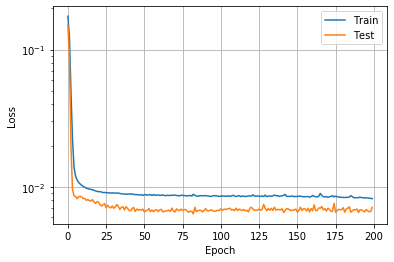

SR: 1.6360698057013643                                                          
100%|██████████| 10/10 [03:06<00:00, 18.67s/trial, best loss: -3.631950410758106]
Best Parameters:
{'adx_period': 3}
Using loaded prices for 2020-10-25
Using loaded prices for 2020-10-25


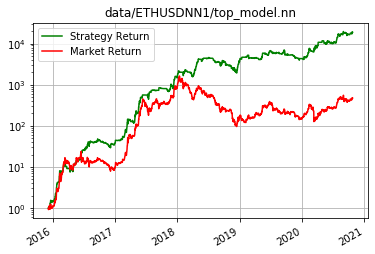

Strategy Return: 18908.77
Market Return: 473.50
Sortino Ratio: 5.70
Bars in Trade: 3
Buy Pct: 0.48
Accuracy: 0.54
Win Ratio: 0.50
Avg Win: 0.07
Avg Loss: 0.02
Risk to Reward: 3.25
Expectancy: 2.53
Sharpe Ratio: 2.79
Average Daily Return: 0.007
SL: 0.00 TP: 0.00


In [23]:
p.datasource = 'cc'
p.model = p.cfgdir+'/model.nn'
p.reload = False
p.train = True
p.train_pct = 0.8
p.test_pct = 0.2
p.epochs = 200
p.batch_size = 100

p.charts = False
p.stats = False
p.top_sr = 0

trials = Trials()

best = fmin(
    fn=f,
    space=space,
    algo=tpe.suggest,
    trials=trials,
    max_evals=10
)

params = space_eval(space, best)
print('Best Parameters:')
print(params)

shutil.move(p.cfgdir + '/top_sc.dmp', p.cfgdir + '/sc.dmp')
shutil.move(p.cfgdir + '/top_sc1.dmp', p.cfgdir + '/sc1.dmp')

p.train = False
p.model = p.cfgdir+'/top_model.nn'
p.test_pct = 1
p.charts = True
p.stats = True

td = nn.runNN1()

p.test_pct = 0.2
td1 = nn.runNN1()